# Deep Learning Lab Assignment 5
Anuj Kinge CSE IS 1 2183043
Problem Statement: Use of different optimizers

### Downloading the flower dataset

In [ ]:
!wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

### Importing the dataset

In [ ]:
import tarfile
dataset = tarfile.open('flower_photos.tgz')

In [ ]:
for name in dataset.getnames():
    tar_member = dataset.getmember(name)
    if(tar_member.isdir()):
         print(name)

flower_photos
flower_photos/roses
flower_photos/sunflowers
flower_photos/tulips
flower_photos/daisy
flower_photos/dandelion


In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['class','dir','image_file'])

In [ ]:
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    if(tar_mem.isfile() and name.endswith('.jpg')):

        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]

        df.loc[df.shape[0]] = [im_class, im_dir, name]

In [ ]:
print('Total images: ', df.shape[0])
df.head()

Total images:  3670


,class,dir,image_file
0,roses,flower_photos/roses,flower_photos/roses/14810868100_87eb739f26_m.jpg
1,roses,flower_photos/roses,flower_photos/roses/1446090416_f0cad5fde4.jpg
2,roses,flower_photos/roses,flower_photos/roses/15319767030_e6c5602a77_m.jpg
3,roses,flower_photos/roses,flower_photos/roses/15032112248_30c5284e54_n.jpg
4,roses,flower_photos/roses,flower_photos/roses/7211616670_2d49ecb3a5_m.jpg


In [ ]:
print(df.groupby(['class']).size())

class
daisy         633
dandelion     898
roses         641
sunflowers    699
tulips        799
dtype: int64


In [ ]:
dataset.extractall(path='data/')

### Create training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.to_csv('data/flower_photos/train.csv',index=False)
test_df.to_csv('data/flower_photos/test.csv', index=False)

In [ ]:
import tensorflow as tf

#### Load image from the disk

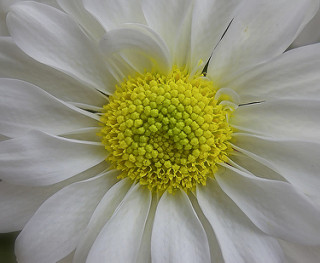

In [ ]:
image_file = 'data/flower_photos/daisy/100080576_f52e8ee070_n.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)

flower_image

In [ ]:
type(flower_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
flower_image2 = tf.keras.preprocessing.image.load_img('data/flower_photos/daisy/10140303196_b88d3d6cec.jpg')

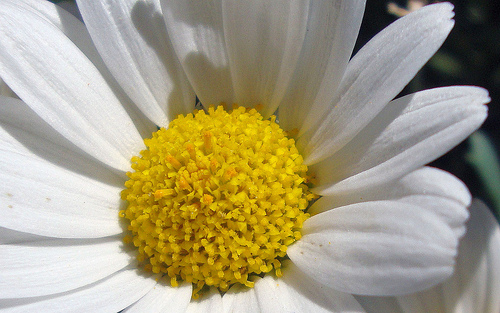

In [ ]:
flower_image2

In [ ]:
#Size of the image
flower_image.size

(320, 263)

In [ ]:
#Size of 2nd image
flower_image2.size

(500, 313)

In [ ]:
#Resizing image
flower_image = flower_image.resize([128,128])

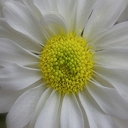

In [ ]:
flower_image

### Converting image to numpy array for ML

In [ ]:
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image)
print('Shape of numpy array', flower_array.shape)

Shape of numpy array (128, 128, 3)


In [ ]:
#Check the contents of the array
flower_array

array([[[137., 137., 135.],
        [144., 145., 145.],
        [148., 149., 149.],
        ...,
        [153., 153., 151.],
        [154., 154., 153.],
        [152., 152., 153.]],

       [[136., 136., 134.],
        [144., 143., 143.],
        [148., 147., 148.],
        ...,
        [154., 154., 152.],
        [153., 153., 152.],
        [150., 150., 150.]],

       [[135., 134., 130.],
        [142., 141., 138.],
        [146., 144., 144.],
        ...,
        [156., 156., 154.],
        [152., 152., 151.],
        [147., 147., 147.]],

       ...,

       [[ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        [ 44.,  46.,  26.],
        ...,
        [129., 125., 124.],
        [128., 124., 123.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        ...,
        [131., 127., 126.],
        [130., 126., 125.],
        [130., 126., 125.]],

       [[ 44.,  47.,  26.],
        [ 44.,  47.,  26.],
        [ 45.,  

### Converting numpy array to image

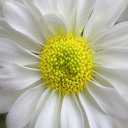

In [ ]:
new_image = tf.keras.preprocessing.image.array_to_img(flower_array)

new_image

### Read training and test data

In [ ]:
import pandas as pd
train_df = pd.read_csv('data/flower_photos/train.csv')
test_df = pd.read_csv('data/flower_photos/test.csv')

In [ ]:
class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)

Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


In [ ]:
img_size = 60 #60 x 60
img_depth = 3  # 3 channeled

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Build batch generator

In [ ]:
import numpy as np

In [ ]:
def batch_generator(df, batchsize=32, train_mode=True):   
    
    img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   horizontal_flip=True)
    
    while True:       
        
        
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0],batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            flower_image =  tf.keras.preprocessing.image.load_img('data/' + 
                                                                  df.loc[batch_nums[i]]['image_file'],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            flower_image = tf.keras.preprocessing.image.img_to_array(flower_image)
            
            if(train_mode):
                #Apply transform
                flower_image =  img_generator.random_transform(flower_image)
            
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['class']
            #Conver class to number
            img_class = class_names.index(img_class)
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = flower_image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels          

### Build CNN Model (Adam Optimizer)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.01, decay = 0.001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) 
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model.fit(train_generator, 
                          epochs=5,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/5
45/45 [==============================] - 52s 1s/step - loss: 3.9024 - accuracy: 0.2615 - val_loss: 1.6095 - val_accuracy: 0.2472
Epoch 2/5
45/45 [==============================] - 51s 1s/step - loss: 1.5988 - accuracy: 0.2406 - val_loss: 1.6093 - val_accuracy: 0.2102
Epoch 3/5
45/45 [==============================] - 50s 1s/step - loss: 1.5986 - accuracy: 0.2361 - val_loss: 1.6128 - val_accuracy: 0.2386
Epoch 4/5
45/45 [==============================] - 50s 1s/step - loss: 1.6037 - accuracy: 0.2181 - val_loss: 1.6083 - val_accuracy: 0.2102
Epoch 5/5
45/45 [==============================] - 50s 1s/step - loss: 1.5997 - accuracy: 0.2365 - val_loss: 1.6044 - val_accuracy: 0.2386


### Build CNN Model (SGD Optimizer)

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.25))

model1.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, decay = 0.001)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) 
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model1.fit(train_generator, 
                          epochs=5,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/5
45/45 [==============================] - 52s 1s/step - loss: 1.4944 - accuracy: 0.3403 - val_loss: 1.3298 - val_accuracy: 0.4318
Epoch 2/5
45/45 [==============================] - 51s 1s/step - loss: 1.3087 - accuracy: 0.4358 - val_loss: 1.1239 - val_accuracy: 0.5497
Epoch 3/5
45/45 [==============================] - 51s 1s/step - loss: 1.2102 - accuracy: 0.4955 - val_loss: 1.1490 - val_accuracy: 0.5028
Epoch 4/5
45/45 [==============================] - 51s 1s/step - loss: 1.1581 - accuracy: 0.5125 - val_loss: 1.1657 - val_accuracy: 0.5142
Epoch 5/5
45/45 [==============================] - 51s 1s/step - loss: 1.1313 - accuracy: 0.5417 - val_loss: 1.1134 - val_accuracy: 0.5398


### Build CNN Model (RMS Prop Optimizer)

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))

model2.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
RMSprop = tf.keras.optimizers.RMSprop(learning_rate = 0.01, decay = 0.001)
model2.compile(optimizer=RMSprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) 
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model2.fit(train_generator, 
                          epochs=5,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/5
45/45 [==============================] - 52s 1s/step - loss: 31.9152 - accuracy: 0.3590 - val_loss: 2.0930 - val_accuracy: 0.2855
Epoch 2/5
45/45 [==============================] - 51s 1s/step - loss: 2.0578 - accuracy: 0.3038 - val_loss: 10.9200 - val_accuracy: 0.1747
Epoch 3/5
45/45 [==============================] - 51s 1s/step - loss: 2.1636 - accuracy: 0.2698 - val_loss: 1.5980 - val_accuracy: 0.2528
Epoch 4/5
45/45 [==============================] - 51s 1s/step - loss: 1.8740 - accuracy: 0.2538 - val_loss: 1.6093 - val_accuracy: 0.2528
Epoch 5/5
45/45 [==============================] - 51s 1s/step - loss: 1.7426 - accuracy: 0.2441 - val_loss: 1.6108 - val_accuracy: 0.2500


### Build CNN Model (Adagrad Optimizer)

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.25))

model3.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

In [ ]:
Adagrad = tf.keras.optimizers.Adagrad(learning_rate = 0.01, decay = 0.001)
model3.compile(optimizer=Adagrad, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batchsize = 64
train_generator = batch_generator(train_df, batchsize=batchsize) 
test_generator = batch_generator(test_df, batchsize=batchsize, train_mode=False)

In [ ]:
model3.fit(train_generator, 
                          epochs=5,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/5
45/45 [==============================] - 51s 1s/step - loss: 1.4315 - accuracy: 0.3733 - val_loss: 1.2335 - val_accuracy: 0.4134
Epoch 2/5
45/45 [==============================] - 51s 1s/step - loss: 1.2282 - accuracy: 0.4788 - val_loss: 1.1120 - val_accuracy: 0.5455
Epoch 3/5
45/45 [==============================] - 51s 1s/step - loss: 1.1474 - accuracy: 0.5205 - val_loss: 1.0725 - val_accuracy: 0.5341
Epoch 4/5
45/45 [==============================] - 51s 1s/step - loss: 1.1163 - accuracy: 0.5399 - val_loss: 1.0806 - val_accuracy: 0.5455
Epoch 5/5
45/45 [==============================] - 51s 1s/step - loss: 1.0868 - accuracy: 0.5656 - val_loss: 1.0893 - val_accuracy: 0.5952
